In [1]:
import sys
sys.path.append('/eos/home-i00/l/lkoller/SWAN_projects/commands/Lya_commands')

from Ltif import Lpicday, Lpic
from sklearn import datasets, metrics, svm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from joblib import dump, load

In [2]:
day = Lpicday('23_12_14')
df = day.clusters_day(min_size = 100)

100%|██████████| 20/20 [00:01<00:00, 17.06it/s]


In [3]:
cl = [val for bal in list(df['cluster']) for val in bal]

max_h = max(len(item) for item in cl) + 10
max_w = max(len(item) for item in [val for bal in cl for val in bal]) + 10

for item in [val for bal in cl for val in bal]:
    while len(item) < max_w:
        item += [0]

for item in cl:
    while len(item) < max_h:
        item += [[0] * max_w]
        
ac = np.array(cl)

data = ac.reshape(264, -1)

In [19]:
max_h, max_w

(53, 42)

In [4]:
target = np.array([1,1,1,1,1,1,1,2,1,2,1,1,2,1,1, #1st file
                  1,1,1,2,1,1,1,1,1,1,1,1,1,1, #2nd file
                  1,1,1,1,2,1,1,1,1,1, #3rd file
                  1,1,1,1,2,1,1,2,2,1,1,2,1, #4th file
                  1,1,2,1,1,1,1,2,2,1,2,1, #5th file !!!!! 1,1,2,1,1,1,1,2,2,1,5,1,
                  1,1,1,1,1,2,1,1,1,1,1, #6th file
                  1,1,1,1,1,2,1,1,1, #7th file !!!!!(the 2 might be a 1)
                  2,1,1,1,1,1,1,1,1,1,1,1, #8th file
                  1,1,1,1,1,2,1,2,1, #9th file
                  1,1,2,1,1,1,1,1, #10th file
                  1,1,1,1,1,1,1,1,2,1,1,2,2,1,1,1,1,1, #11th file
                  1,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1, #12th file
                  1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1, #13th file
                  1,1,1,1,2,1,1,1,1,1,1,1,1,1,1, #1,1,1,1,1,2,1,1,1,1,1,1,1, #14th file
                  1,1,1,2,1,2,2,1,1,1,1,1,1,1,2, #15th file !!!!! 1,1,1,2,1,2,4,1,1,1,1,1,1,1,2,
                  1,1,1,1,1,1,1,1,1,1,1,1,2,1, #16th file
                  1,1,1,1,1,1,1,1,1,2,2,1,1,1,1,1,2,2,1,1,2,1,1, #17th file
                  1,1,2,1,1,1,1,1,1,1,2,1,1, #18th file
                  1,1,1,1,1,1,1,1,1,2,1, #19th file
                  1,1,1,1,1,1,1]) #20th file

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, shuffle=False)

clf = svm.SVC()
clf.fit(data, target)


SVC()

In [6]:
dump(clf, '/eos/user/l/lkoller/ML models/clust_num_v1.txt')

['/eos/user/l/lkoller/ML models/clust_num_v1.txt']

(2, <matplotlib.image.AxesImage at 0x7fe58b22c6d0>)

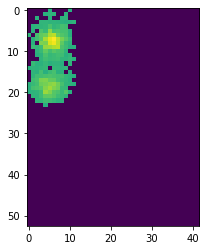

In [10]:
target[101], plt.imshow(cl[101])

In [13]:
clf.predict([data[101]])

array([2])

In [168]:
res = 0
for i in range(20):
    res += len(df['size'][i])
    
res

264

In [167]:
len(df['size'][19])

7

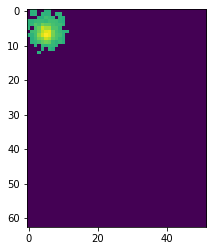

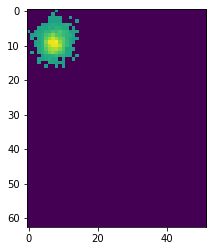

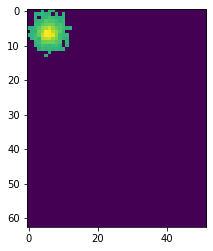

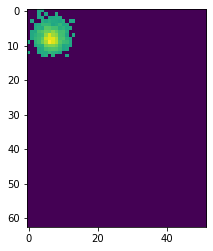

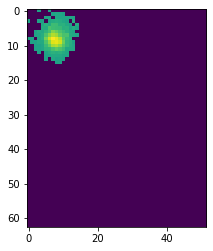

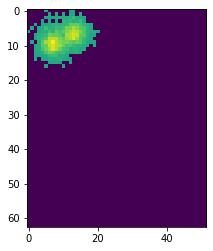

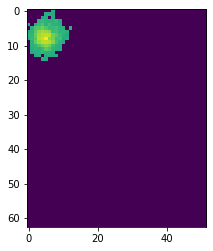

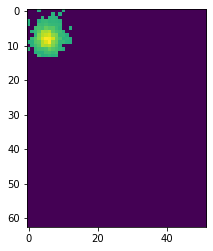

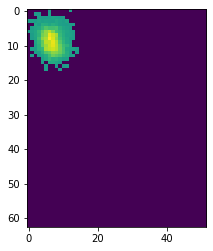

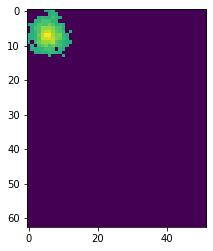

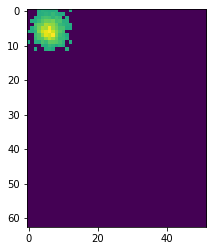

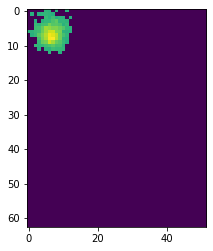

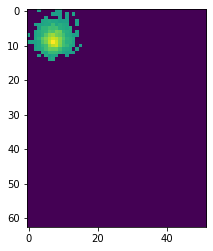

In [153]:
for i in range(13): 
    plt.figure()
    plt.imshow(cl[i+64])

In [122]:
len([val for bal in df['size'] for val in bal])

264

In [ ]:
df[size]

In [132]:
264 - 239

25